In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
SKYA=pd.read_csv("C:/Users/Harish/GRE_Reg_Data.csv")

In [107]:
SKYA.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,1700,0,NaN
1,220314085,7/22/2022,5/12/2020,1110,27,F
2,222013040,8/6/2022,6/4/2020,1620,60,M
3,220614831,8/18/2022,8/17/2020,1200,28,M
4,231207725,2/27/2023,1/27/2020,635,37,M


In [108]:
SKYA.shape

(247988, 6)

In [109]:
SKYA.columns

Index(['REGISTRATION_NO', 'Date Registered', 'DATE OF EXAM OCC', 'TIME OCC',
       'Age', 'Sex'],
      dtype='object')

In [110]:
SKYA.isna().any()

REGISTRATION_NO     False
Date Registered     False
DATE OF EXAM OCC    False
TIME OCC            False
Age                 False
Sex                  True
dtype: bool

In [111]:
SKYA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   REGISTRATION_NO   247988 non-null  int64 
 1   Date Registered   247988 non-null  object
 2   DATE OF EXAM OCC  247988 non-null  object
 3   TIME OCC          247988 non-null  int64 
 4   Age               247988 non-null  int64 
 5   Sex               215740 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.4+ MB


In [112]:
SKYA.describe()

,REGISTRATION_NO,TIME OCC,Age
count,2.479880e+05,247988.000000,247988.000000
mean,2.256571e+08,1317.184662,29.954764
std,5.042345e+06,655.090477,21.901016
min,2.203000e+03,1.000000,-2.000000
25%,2.210130e+08,845.000000,0.000000
50%,2.220131e+08,1400.000000,31.000000
75%,2.310058e+08,1843.000000,45.000000
max,2.399165e+08,2359.000000,99.000000


# Question 1: Which hour has the highest frequency of candidates scheduled to take up exams? 

# Show the plot diagram of the frequencies.

# Firstly in given dataset there is no Hours and minutes data where TIME OCC has all integer values. 

# So need of creating new column named Hour_Minute is required

# Firstly TIME OCC need to be converted to string used .astype(str)

# From that str we need to extract hour and minute format like HH:MM so the number or integer should be in 4 digit long

# If the number is no 4 digit long it will assign 0 automatically - str.strip.zfill 

# For conversion hour will take first 2 digits and minutes will take remaining 2 digits like str[:2], str[2:]

# Finally return HH:MM format

In [113]:
SKYA['TIME OCC'] = SKYA['TIME OCC'].astype(str)

def convert_to_hhmm(time_str):
    time_str = time_str.strip().zfill(4)
    hour = time_str[:2]
    minute = time_str[2:]
    return f"{hour}:{minute}"

In [114]:
SKYA['Hour_Minute'] = SKYA['TIME OCC'].apply(convert_to_hhmm)

SKYA[['TIME OCC', 'Hour_Minute']].head()

,TIME OCC,Hour_Minute
0,1700,17:00
1,1110,11:10
2,1620,16:20
3,1200,12:00
4,635,06:35


# printing the frquencies

In [115]:
hour_frequency = SKYA['Hour_Minute'].value_counts().sort_index()
print(hour_frequency)

00:01    4433
00:02      87
00:03      76
00:04      58
00:05     809
         ... 
23:55     262
23:56      13
23:57      14
23:58      27
23:59     167
Name: Hour_Minute, Length: 1439, dtype: int64


# Plotting the frequencies 

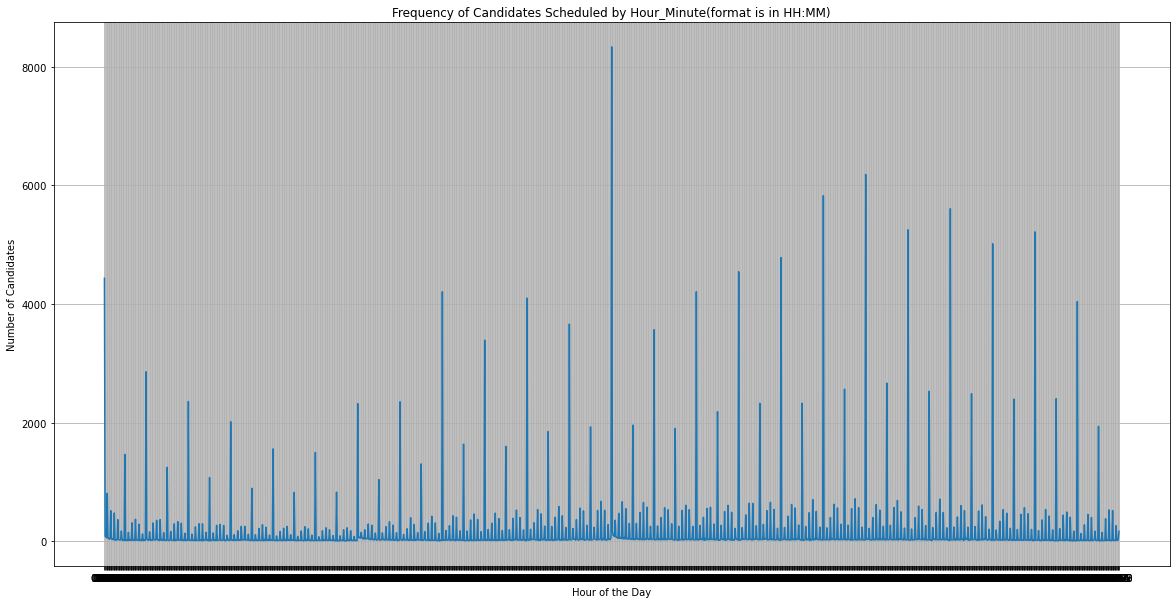

The hour with the highest frequency of candidates scheduled to take exams is: 12:00


In [116]:
plt.figure(figsize=(20, 10))
plt.plot(hour_frequency.index, hour_frequency.values)
plt.title('Frequency of Candidates Scheduled by Hour_Minute(format is in HH:MM)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.grid(True)
plt.show()

highest_frequency_hour = hour_frequency.idxmax()
print(f'The hour with the highest frequency of candidates scheduled to take exams is: {highest_frequency_hour}')

# Conclusion: At 12'o clock the more number of candidates gave their exam

# Question 2: Create stacked bar graph of the number of candidates taken exam both at day and night (Day being 06:00 AM to 09:00 PM)

# Here first as per question Day and Night column should be created where after 6:00 am to 9:00(21:00) pm is day and else is night.

# First spliting the Hour_Minute column to Hour and Minutes column and calculating Hours or directly we can use Hour column. 

# Converting minutes to hours and later classifying those hours to Day and Night values in and assign new column named Day_Night

# Finally printing the rows

In [117]:
SKYA['Hour'] = SKYA['Hour_Minute'].str[:2].astype(int)
SKYA['Minutes'] = SKYA['Hour_Minute'].str[3:].astype(int)
SKYA['Hours'] = SKYA['Hour'] + SKYA['Minutes'] / 60

def classify_day_night(Hours):
    if 6 <= Hours < 21:
        return "Day"
    else:
        return "Night"

SKYA['Day_Night'] = SKYA['Hours'].apply(classify_day_night)

day_night_counts = SKYA['Day_Night'].value_counts()

print(day_night_counts)

SKYA[['TIME OCC', 'Hour_Minute', 'Hour', 'Minutes', 'Hours', 'Day_Night']].head()

Day      174932
Night     73056
Name: Day_Night, dtype: int64


,TIME OCC,Hour_Minute,Hour,Minutes,Hours,Day_Night
0,1700,17:00,17,0,17.000000,Day
1,1110,11:10,11,10,11.166667,Day
2,1620,16:20,16,20,16.333333,Day
3,1200,12:00,12,0,12.000000,Day
4,635,06:35,6,35,6.583333,Day


# Printing the Day and Night frequencies

In [118]:
day_night_frequency = SKYA['Day_Night'].value_counts()

print(day_night_frequency)

Day      174932
Night     73056
Name: Day_Night, dtype: int64


# Plotting the bar graph

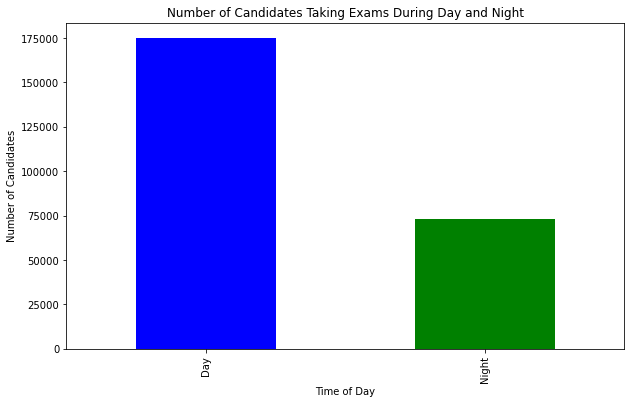

In [120]:
plt.figure(figsize=(10, 6))
day_night_frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Candidates Taking Exams During Day and Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Candidates')
plt.show()

# Conclusion: During Day time more candidates gave their exam

# Question 3: Identify the number of candidates scheduled to write exam in different age groups, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of candidates scheduled as the values.

# Firstly i created new column named Age_Group where i used basic functions, if and else statements using already given data which is Age

In [121]:
def categorize_age(Age):
    if Age <= 17:
        return "0-17"
    elif Age >= 18 and Age <= 25:
        return "18-25"
    elif Age >= 26 and Age <= 34:
        return "26-34"
    elif Age >= 35 and Age <= 44:
        return "35-44"
    elif Age >= 45 and Age <= 54:
        return "45-54"
    elif Age >= 55 and Age <= 64:
        return "55-64"
    else:
        return "65+"

SKYA['Age_Group'] = SKYA['Age'].apply(categorize_age)

In [125]:
SKYA

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,Hour_Minute,Hour,Minutes,Hours,Day_Night,Age_Group
0,221412410,6/15/2022,11/12/2020,1700,0,NaN,17:00,17,0,17.000000,Day,0-17
1,220314085,7/22/2022,5/12/2020,1110,27,F,11:10,11,10,11.166667,Day,26-34
2,222013040,8/6/2022,6/4/2020,1620,60,M,16:20,16,20,16.333333,Day,55-64
3,220614831,8/18/2022,8/17/2020,1200,28,M,12:00,12,0,12.000000,Day,26-34
4,231207725,2/27/2023,1/27/2020,635,37,M,06:35,6,35,6.583333,Day,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...
247983,231510379,5/29/2023,5/25/2023,1100,25,M,11:00,11,0,11.000000,Day,18-25
247984,231604807,1/27/2023,1/26/2023,1800,23,M,18:00,18,0,18.000000,Day,18-25
247985,231606525,3/22/2023,3/22/2023,1000,25,F,10:00,10,0,10.000000,Day,18-25
247986,231210064,4/12/2023,4/12/2023,1630,29,M,16:30,16,30,16.500000,Day,26-34


# Now printing frequencies of newly created columns Age_Group where it will show distinct count of candidates who are present in that Age_Group

In [123]:
age_group_frequency = SKYA['Age_Group'].value_counts().sort_index()

print(age_group_frequency)

0-17     66801
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age_Group, dtype: int64


# Showing the frequencies through Histogram Plot

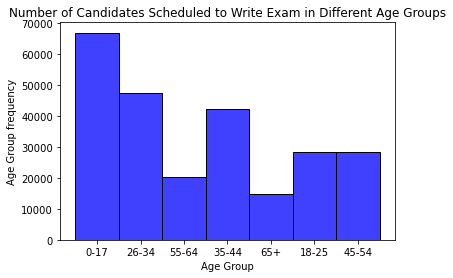

In [124]:
sns.histplot(SKYA['Age_Group'], bins=7, color='blue')

plt.xlabel('Age Group')
plt.ylabel('Age Group frequency')
plt.title('Number of Candidates Scheduled to Write Exam in Different Age Groups')

plt.show()

# Conclusion: Age between 0-17 have more participation